## NumPy

In [1]:
import numpy as np

Arrays are low-level data structures. They have a fixed block of memory and a fixed datatype for the elements. We also keep track of the array's shape, but shapes can be malleable. The big block of memory is really just a 1-D thing.  Any structure we put on it (say, 4 rows and 6 columns) will have some other ways of regularly chunking it (24 elements, 6x4, 8x3, 3x8, etc.).

In [2]:
arr_int = np.array([1,2,3,4,5,6]) # array of size 6

print(arr_int)
print(arr_int.size, '\n', arr_int.shape)
arr_reshape = arr_int.reshape(3,2)
print(arr_reshape)
print(arr_reshape.size, '\n', arr_reshape.shape) # array of size 3, reshaped as 3 rows, 2 columns

[1 2 3 4 5 6]
6 
 (6,)
[[1 2]
 [3 4]
 [5 6]]
6 
 (3, 2)


In [3]:
# function to show attributes of an array
def show_array(arr):
    print(arr)
    for attr in ["size", "shape", "dtype"]:
        print("{:>5s} {}".format(attr, getattr(arr, attr)))

# create array from range of values and shape it with 3 rows, 4 cols
arr_range = np.arange(12.0).reshape(3,4)
show_array(arr_range)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
 size 12
shape (3, 4)
dtype float64


Types of arrays include `uint8`, `float64`, and `int64`

In [4]:
# other forms along with most useful dtypes for computer vision:
np.array([2,2], dtype=np.uint8) # define type
np.array([2,2]).astype(np.float64) # cast type, temp array (int64) created
np.int64([2,2,2]) # define type

array([2, 2, 2], dtype=int64)

In [5]:
# defining the size separately
npr = np.random
arr_rnd = npr.randint(0, 256, size=(5,5))
show_array(arr_rnd)

[[237 212  93 152 208]
 [ 65 204 118 157 192]
 [199 145  83 109  73]
 [104  67 255 105 133]
 [175 244 100 149  59]]
 size 25
shape (5, 5)
dtype int32


In [6]:
# changing shapes *does not* copy the array
alias = arr_rnd.reshape(25)
alias[0] = -99
print(alias[0], arr_rnd[0])

-99 [-99 212  93 152 208]


In [7]:
# changing dtype DOES copy the array
arr_rnd_float = arr_rnd.astype(np.float64)
arr_rnd_float[0,0] = -0.99
print(arr_rnd[0], arr_rnd_float[0])

[-99 212  93 152 208] [ -0.99 212.    93.   152.   208.  ]


In [8]:
# we can select out rows and columns
slice = arr_rnd[:2, 1]  # first two rows, column 1
print(slice)
# we can apply operations to blocks of elements in one-shot
arr_rnd[:3, :3] = arr_rnd[:3, :3] * 2

# we can assign to block of elements
arr_rnd[:2, :2] = arr_rnd[:2, :2] = 1
print(arr_rnd)

[212 204]
[[  1   1 186 152 208]
 [  1   1 236 157 192]
 [398 290 166 109  73]
 [104  67 255 105 133]
 [175 244 100 149  59]]


Summing over `axis=0` means summing over the *outer-most* dimension of the array.

In [9]:
arr = np.arange(10).reshape(5,2)
column_sums = arr.sum(axis=0)
print(arr, arr.shape, column_sums, sep='\n')

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
(5, 2)
[20 25]


Below, we loop over `axis=1` (`arr.shape[1]`). This gives 2 columns and adds them up to produce a new "pseudo-column".  This pseudo-column holds *the row sums*.

In [10]:
row_sums = arr.sum(axis=1)
print(arr, arr.shape, arr.sum(axis=1), sep='\n')

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
(5, 2)
[ 1  5  9 13 17]


1.  The output looks like a "row" but it is really 1-D.  This is because we have "summed out" and hence, reduced, one dimension of the array.
2.  If you want a 2-D result, you can use the argument `keepdims=True`.

In [11]:
print(arr, arr.shape, arr.sum(axis=1, keepdims=True), sep='\n')

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
(5, 2)
[[ 1]
 [ 5]
 [ 9]
 [13]
 [17]]


We can build new arrays by "pasting together" sources arrays in a few ways.  The most general is `np.concatenate`:

In [12]:
column_sums = arr.sum(axis=0, keepdims=True)
np.concatenate([arr, column_sums], axis=0)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [20, 25]])

In [13]:
row_sums = arr.sum(axis=1, keepdims=True)
np.concatenate([arr, row_sums], axis=1)

array([[ 0,  1,  1],
       [ 2,  3,  5],
       [ 4,  5,  9],
       [ 6,  7, 13],
       [ 8,  9, 17]])

## Matplotlib

In [14]:
import matplotlib.pyplot as plt  
%matplotlib inline               

Simple example.

Text(0.5,0,'Time')

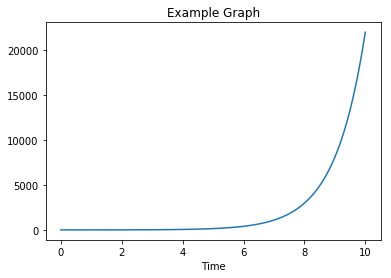

In [15]:
xs = np.linspace(0,10, 100)
ys = np.exp(xs)

ax = plt.gca() # explicitly get the default (current) drawing axis

ax.plot(xs, ys)       
ax.set_title("Example Graph")
ax.set_xlabel("Time")
#ax.axis('off');

Counter({57: 2, 35: 1, 5: 1, 55: 1, 85: 1, 28: 1, 76: 1, 25: 1, 15: 1, 79: 1, 91: 1, 81: 1, 36: 1, 13: 1, 46: 1, 43: 1, 56: 1, 94: 1, 88: 1})


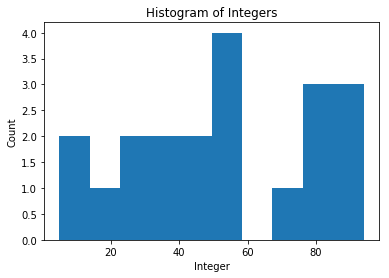

In [16]:
ax = plt.gca()
arr = npr.randint(0,100,20)
ax.hist(arr, bins=10)

ax.set_xlabel("Integer")
ax.set_ylabel("Count")
ax.set_title("Histogram of Integers")

import collections as co
print(co.Counter(arr))

The  matplotlib command`imshow` is used to display an array with colors. By default the range [0,1] is expanded to fill the [0,255] intensity scale. The argument `cmap` imposes grayscale.

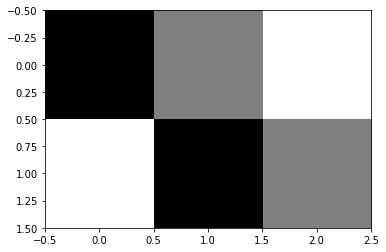

In [17]:
arr = np.array([[0,1,2],
                [2,0,1]], dtype=np.float64)
plt.gca().imshow(arr, cmap='gray')

Since we will be using this pattern so frequently, we'll give it a name and wrap it up in a function.  Note, we set interpolation to bicubic for a default so that "real world" images look better when we display them.  We'll have to remember that so that we can "turn it off" (pass `interpolation=None` ... which really does nearest neighbor interpolation but is close to showing the data as it is).  

In [18]:
# line 5:  def my_show(**kwargs) --> takes any "extra" keyword arguments and 
#                                    puts them in a dictionary named kwargs
# line 7:  ax.imshow(**kwargs)   --> takes kwargs (a dictionary) and 
#                                    "expands" them into keyword arguments to imshow
def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    ' helper to display an image, in grayscale, on an axes without grid/spine '
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

Often, we'll want to compare several images (before and after some processing step).  To do that, we'll want more than one matplotlib axis to draw on.  `subplots` gives us a convenient way to get the axes to work with.  Then, we can pass different axes on to our show functions.

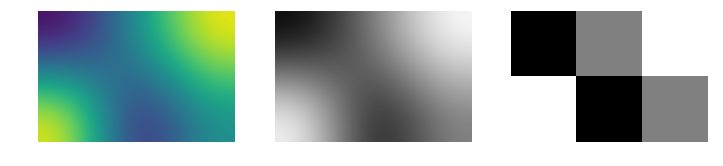

In [19]:
fig, axes = plt.subplots(1,3,figsize=(12,3)) # 1 row, 3 columns
# figsize refers to the total size of the figure, not of individual subplots
arr = np.array([[0,1,2],
                [2,0,1]], dtype=np.float64)
my_show(axes[0], arr) # without the default cmap argument
my_gshow(axes[1], arr)
my_gshow(axes[2], arr, interpolation=None)

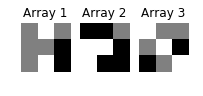

In [20]:
fig, axes = plt.subplots(1,3,figsize=(3,9))  # 1 row, 3 columns of figures
axes = axes.flat # a 1-D iterable of the axes (row-major)

# make three random tiny arrays with 3 'colors' each
rnd_arrays = [npr.randint(0,3,(3,3)) for i in range(5)]

for idx, (ax, arr) in enumerate(zip(axes, rnd_arrays), 1):
    my_gshow(ax, arr, interpolation=None, title="Array {}".format(idx))

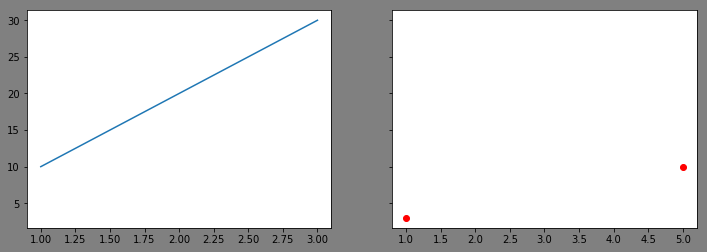

In [21]:
# note the use of facecolor for the entire figure
fig, axes = plt.subplots(1,2,facecolor='gray', figsize=(12,4), sharey=True)
axes[0].plot([1,2,3], [10,20,30])
axes[1].plot([1,5], [3,10], 'ro');

## OpenCV

In [22]:
import cv2
img_dir = 'images/'

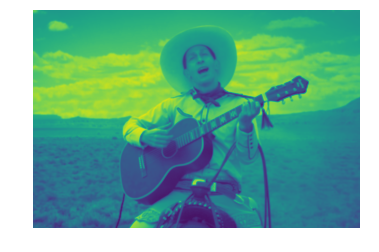

In [23]:
def load_image(img_dir, img_name, color=1):
    """
    color: 0 for gray, 1 for color
    """
    img = cv2.imread(img_dir + img_name, color)
    return img

img = load_image(img_dir, 'buster.jpeg', 0)
my_show(plt.gca(), img)

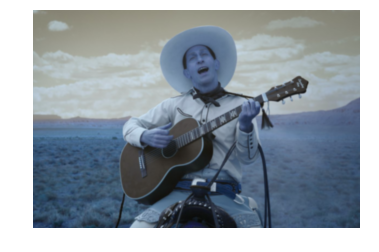

In [24]:
img = load_image(img_dir, 'buster.jpeg', 1)
my_show(plt.gca(), img)

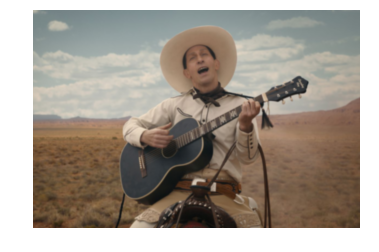

In [25]:
# explicitly convert the image to RGB
img = load_image(img_dir, 'buster.jpeg', 1)
buster_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
my_show(plt.gca(), buster_rgb)

In [26]:
def my_read(filename):
    ' read from an image file to an rgb '
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def my_read_cg(filename):
    ' read from an image file to an rgb and a grayscale image array '
    rgb = my_read(filename)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    return rgb, gray

buster_rgb = my_read(img_dir + 'buster.jpeg')
# or
buster_rgb, buster_gray = my_read_cg(img_dir + 'buster.jpeg')

## OpenCV Images as NumPy Arrays

Since buster_rgb is "just" a NumPy array, we can do NumPy array things:

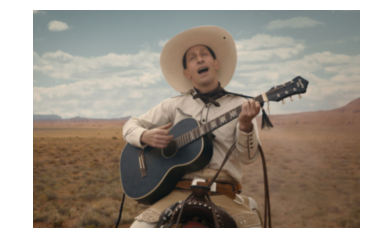

In [27]:
buster_rgb[100:105,700:705]=[0,0,0] # black pixel on hat
my_show(plt.gca(), buster_rgb)

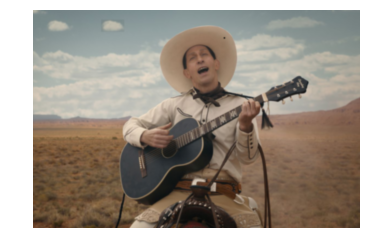

In [28]:
cloud_soi = buster_rgb[35:80, 50:135]
buster_rgb[35:80, 250:335] = cloud_soi # add another cloud
my_show(plt.gca(), buster_rgb)

In [29]:
# split color channels
chans = r,g,b = cv2.split(buster_rgb)
restored = cv2.merge((r,g,b))
print(r.shape, restored.shape)

(800, 1200) (800, 1200, 3)


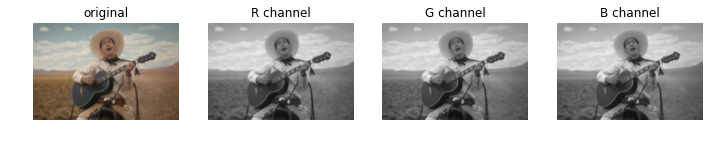

In [30]:
fig, axes = plt.subplots(1,4,figsize=(12,3))
axes = axes.flat

# handle first as special case
first_axis = next(axes)
my_show(first_axis, buster_rgb)
first_axis.set_title("original")

# display per channel images
for ax, ch, name in zip(axes, chans, ["R", "G", "B"]):
    my_gshow(ax, g)
    ax.set_title("{} channel".format(name))

In [31]:
# cv2.split is a convenience wrapper around numpy's split command
# aka, split on last axis into size(last axis) pieces
r_np,_,_ = np.split(buster_rgb, buster_rgb.shape[-1], -1) 
print(r_np.shape,
      np.allclose(r, r_np[:,:,0])) # only 1D in last axis, so index it out

(800, 1200, 1) True


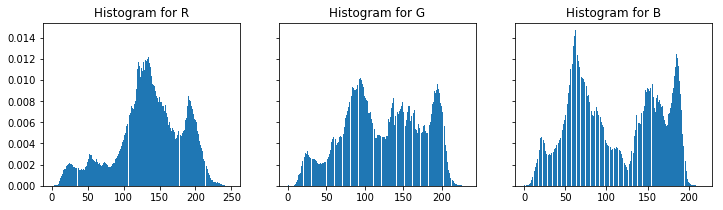

In [32]:
# matplotlib histograms
color_to_index = {"R":0, "G":1, "B":2}  # map strings to appropriate index

fig, axes = plt.subplots(1,3,figsize=(12,3), sharey=True)

for ax, color in zip(axes, color_to_index):
    c = color_to_index[color]
    this_channel = buster_rgb[:,:,c].ravel() # 1D view without copying 
    
    ax.hist(this_channel, 256, density=True)
    ax.set_title("Histogram for {}".format(color))

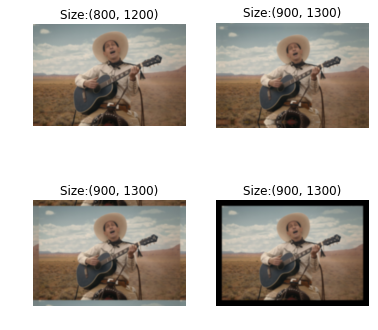

In [33]:
fig, axes = plt.subplots(2,2,figsize=(6,6))
axes = axes.flat

buster = my_read(img_dir + 'buster.jpeg')
my_show(next(axes), buster, title="Size:{}".format(buster.shape[:2]))

borders = [cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_CONSTANT]
for ax, border in zip(axes, borders):
    with_border = cv2.copyMakeBorder(buster, 50,50,50,50,border)
    my_show(ax, with_border, title="Size:{}".format(with_border.shape[:2]))

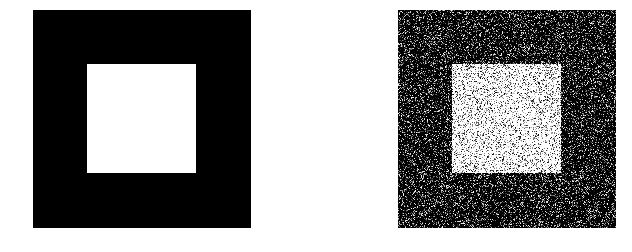

In [34]:
# example of adding noise to image
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes = axes.flat

shape = (300,300)

orig = np.zeros(shape, dtype=np.uint8) # black square
orig[75:225, 75:225] = 255 # set to white
my_gshow(next(axes), orig, interpolation=None)

blur = np.random.randint(0,256,size=shape).astype(np.uint8)
blurred = np.where(np.random.uniform(size=shape) > .3, orig, blur)
my_gshow(next(axes), blurred, interpolation=None)

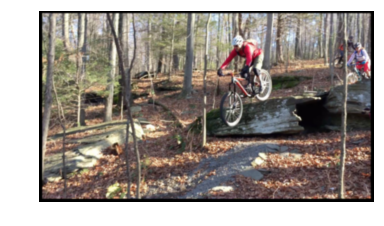

In [35]:
outdoors = my_read(img_dir + 'farm-drop.jpg')
with_border = cv2.copyMakeBorder(outdoors, 20,20,20,20,cv2.BORDER_CONSTANT)
my_show(plt.gca(), with_border)

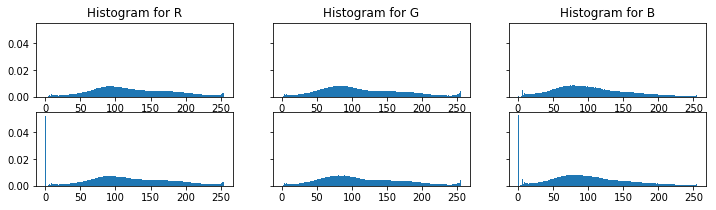

In [36]:
color_to_index = {"R":0, "G":1, "B":2}

fig, axes = plt.subplots(2,3,figsize=(12,3), sharey=True)
for column, color in enumerate(color_to_index):
    for row, img in enumerate([outdoors, with_border]): 
        c = color_to_index[color]
        this_channel = img[:,:,c].ravel()

        axes[row, column].hist(this_channel, 256, density=True)
        axes[0,column].set_title("Histogram for {}".format(color))

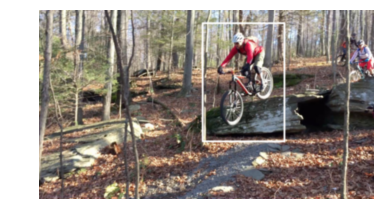

In [37]:
# your region of interest
marked_up = cv2.rectangle(outdoors, (1000,80), (1500, 800), (255,255,255), 10)
my_show(plt.gca(), marked_up)

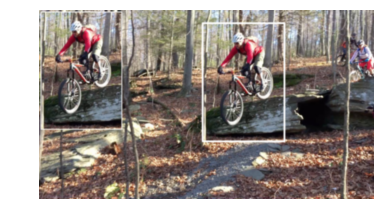

In [38]:
# duplicate the ROI in another part of the image
roi = marked_up[81:800, 1001:1500]
shape = roi.shape
marked_up[10:10+shape[0],10:10+shape[1]] = roi
my_show(plt.gca(), marked_up)